In [1]:
from connector import odps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
table_users = odps.get_table('Qkids_V2_dev.dws_student_source_categroy_count')
temp_list = list()
for row in odps.read_table('Qkids_V2_dev.dws_student_source_categroy_count'):
    temp_list.append(row.values)
df = pd.DataFrame(temp_list, columns = ['source_cata', 'registed', 'vip', 'num'])
time_df = df.set_index('registed')
time_df= pd.DatetimeIndex(time_df.index)

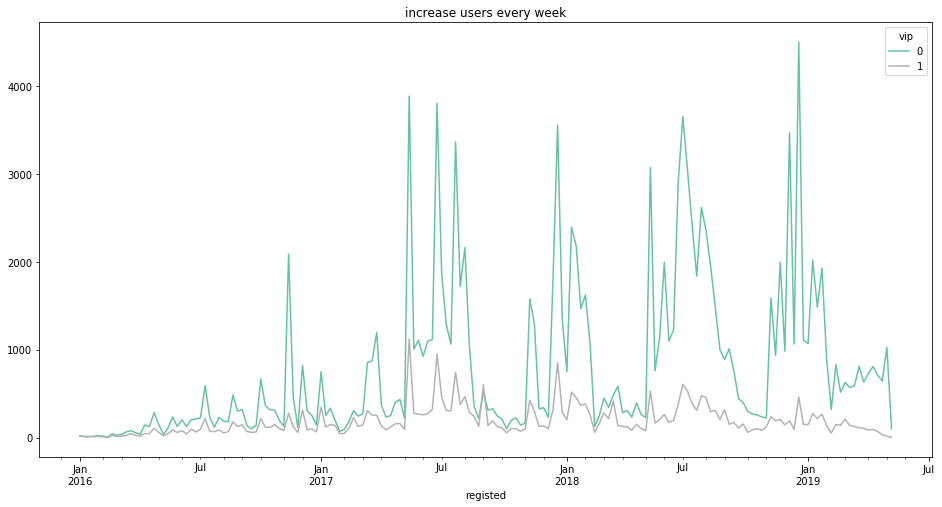

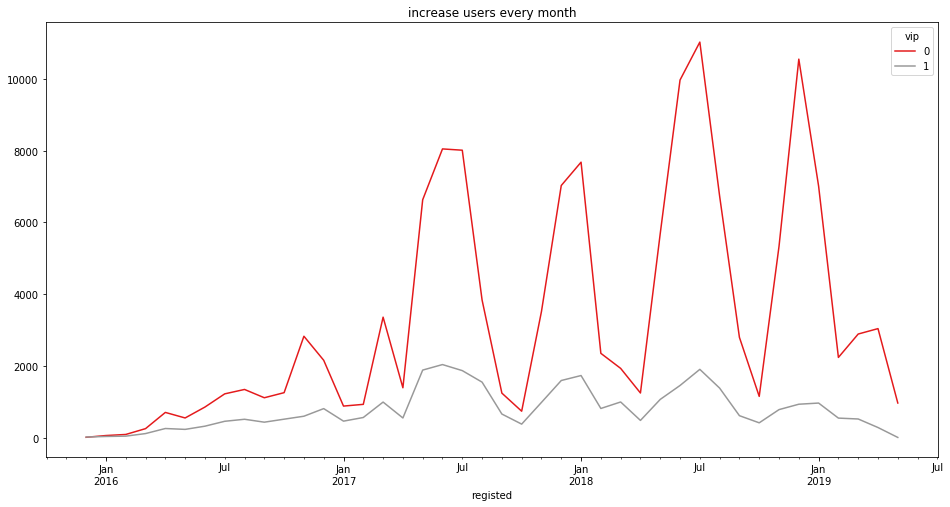

In [3]:
base_vip_num = time_df.pivot_table(values='num', columns='vip', index='registed')
vip_num_week = base_vip_num.resample('W').sum()
vip_num_week.plot(kind='line', figsize=(16,8), colormap = 'Set2',
            title = 'increase users every week')
vip_num_month = base_vip_num.resample('M').sum()
vip_num_month.plot(kind='line', figsize=(16,8), colormap = 'Set1',
            title = 'increase users every month')

In [4]:
vip_cata = time_df.loc[time_df.vip == 1].groupby('source_cata').sum().num
cata = time_df.groupby('source_cata').sum().num
cata.index = ['advertise','refere','self','group','other','dt']
vip_cata.index = ['advertise','refere','self','group','other','dt']

([<matplotlib.patches.Wedge at 0x7f11adddf588>,
 [Text(1.5052613839230928, 0.2111591013192089, 'advertise'),
  Text(0.5200753428016183, 1.213227776557139, 'refere'),
  Text(-0.710126269094762, 1.1127087138786835, 'self'),
  Text(-0.8579486513078535, -1.0031570723067427, 'group'),
  Text(1.4025716593527697, -0.5858265446191546, 'other'),
  Text(1.5037093421457293, -0.22194191659904822, 'dt')],
 [Text(1.0695278254190397, 0.1500340983057537, '4.44'),
  Text(0.3467168952010789, 0.8088185177047594, '28.24'),
  Text(-0.47341751272984134, 0.7418058092524557, '2.74'),
  Text(-0.571965767538569, -0.6687713815378286, '56.66'),
  Text(0.9965640737506523, -0.41624517643992565, '3.27'),
  Text(1.0684250588930182, -0.1576955723203764, '4.66')])

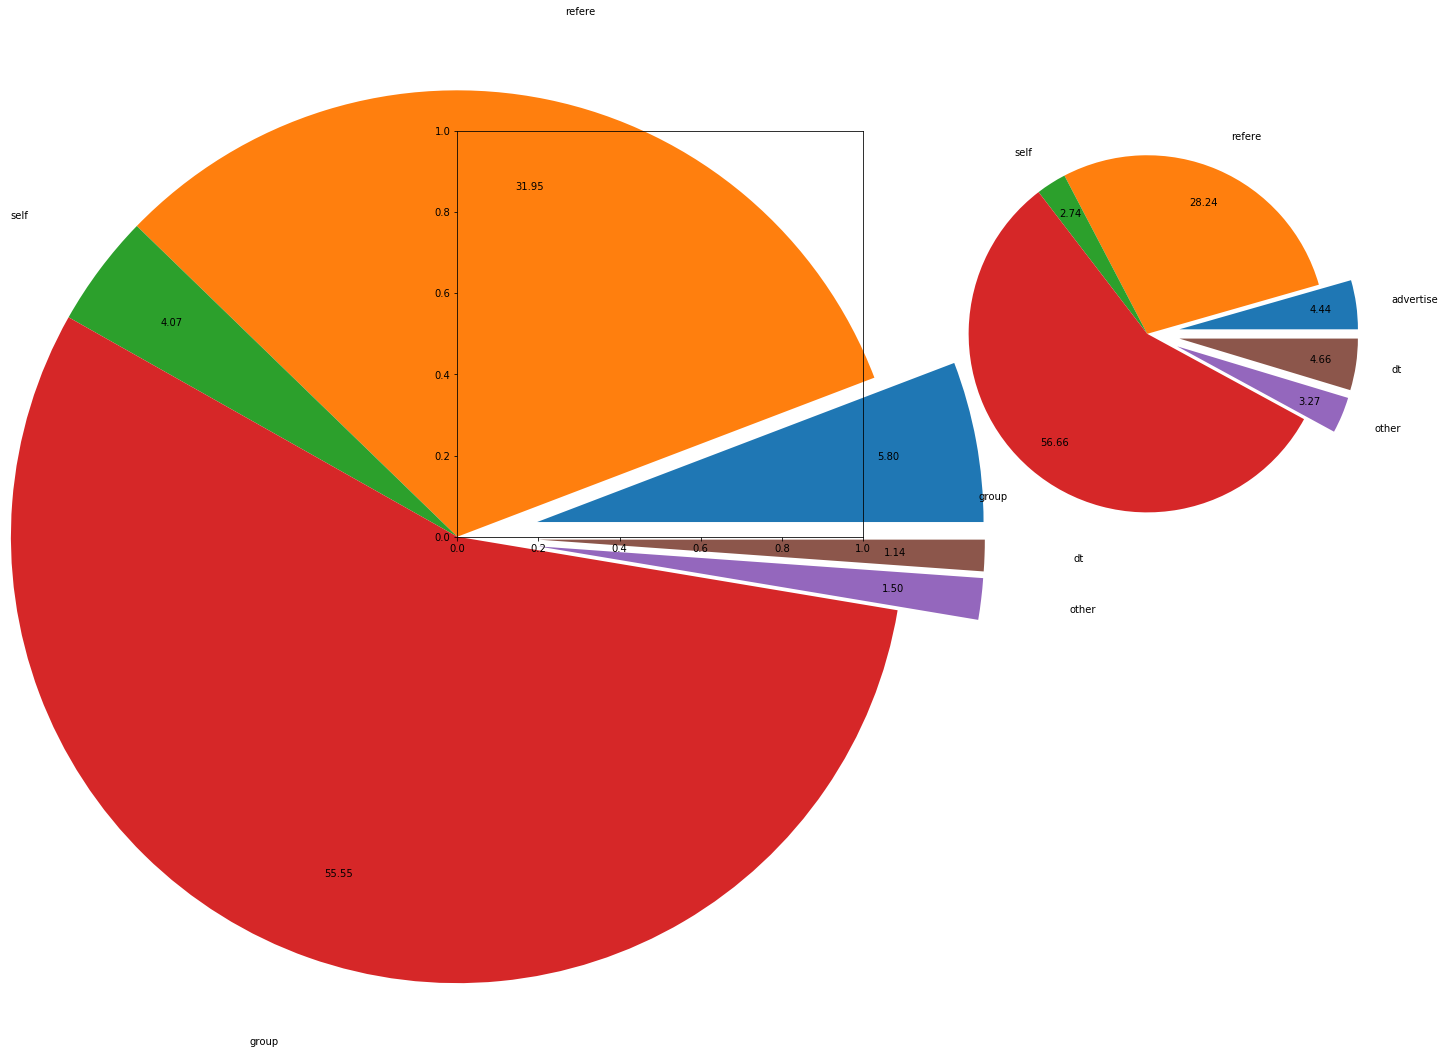

In [43]:
plt.figure(num=2, figsize = (16,8))
fig = plt.subplot(121)
plt.pie(vip_cata,  autopct = '%.2f', pctdistance=0.8, 
        labels = vip_cata.index, labeldistance = 1.2,
        shadow = False, startangle = 0, radius = 1.1,
        explode=[0.2,0,0,0,0.2,0.2])
fig = plt.subplot(122)
plt.pie(cata,  autopct = '%.2f', pctdistance=0.8, 
        labels = vip_cata.index, labeldistance = 1.2,
        shadow = False, startangle = 0, radius = 1.1,
        explode=[0.2,0,0,0,0.2,0.2])

In [10]:
fig = plt.subplot(121)
vip_cata.plot(kind='pie',figsize = (14,8), label='vip', title = 'vip increase catagory'，
fig = plt.subplot(122)
cata.plot(kind='pie', figsize = (14,8), label='unvip', title = 'unvip increase catagory')

SyntaxError: invalid character in identifier (<ipython-input-10-6533723e59eb>, line 2)

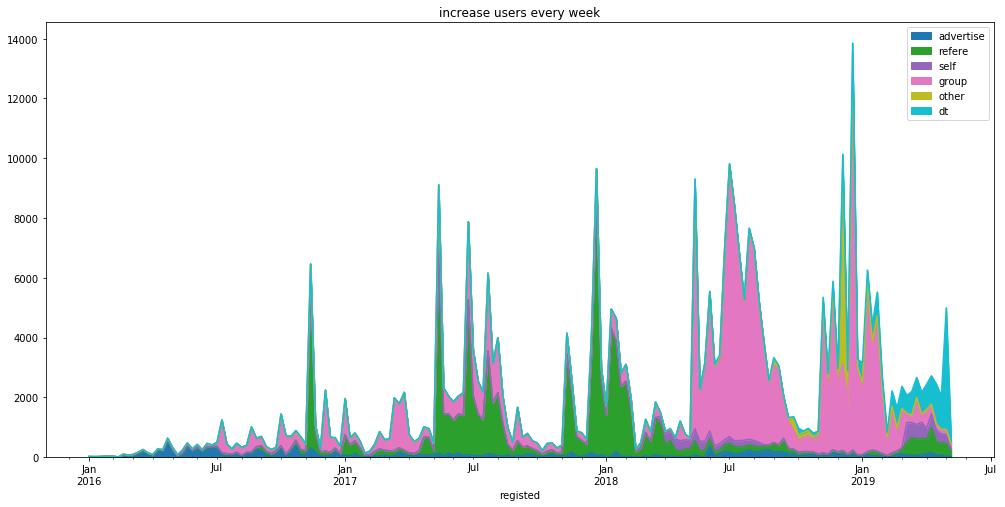

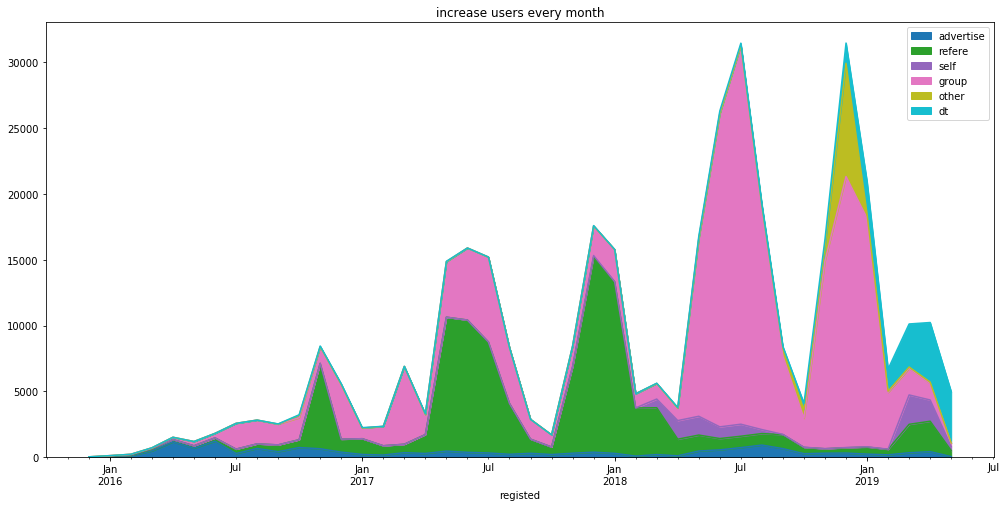

In [6]:
base_cata_users =  time_df.pivot_table(values='num', columns='source_cata', index='registed')
base_cata_users.columns =  ['advertise','refere','self','group','other','dt']
cata_users_week = base_cata_users.resample('W').sum()
cata_users_week.plot(kind='area', figsize = (17,8), colormap = 'tab10',  title = 'increase users every week')
cata_users_month = base_cata_users.resample('M').sum()
cata_users_month.plot(kind='area', figsize = (17,8), colormap = 'tab10',  title = 'increase users every month')

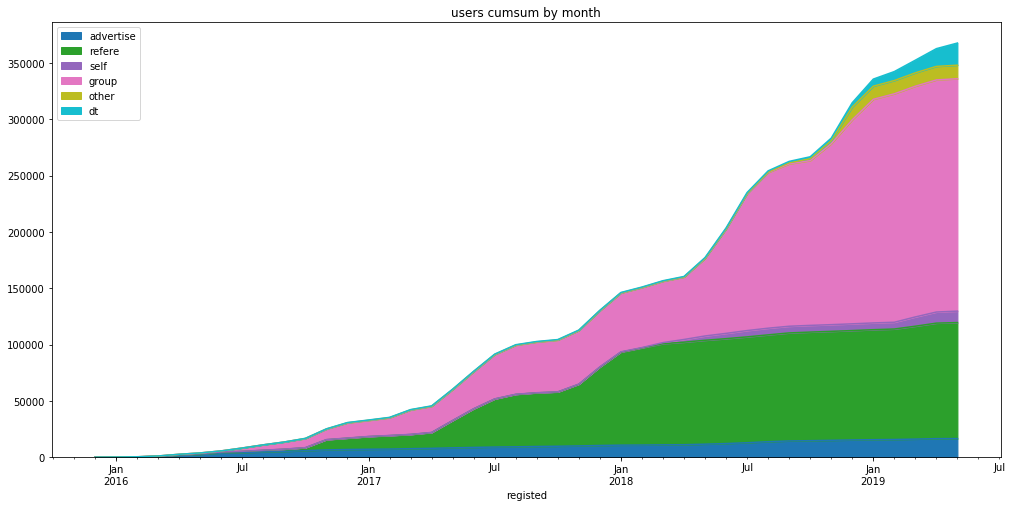

In [8]:
cata_users_month.cumsum().plot(kind='area', figsize = (17,8), colormap = 'tab10',  title = 'users cumsum by month')